## Comprehensive Sleep Disorder Prediction and Analysis System
## Group=13                                              

In [425]:
import pandas as pd
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

#Loading the Dataset
file_path = 'Comprehensive_sleep_Disorder_Prediction_and_Analysis_Sysytem_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


**Cleaning**


In [426]:
df.isnull().sum() # check for missing values in the Dataframe

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [427]:
# Display information about the DataFrame, including the data types and non-null values count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [428]:
df.describe() # Display statistics of the Dataframe

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [429]:
# Count the occurrences of each unique value in the 'Sleep Disorder' column
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [430]:
# Count the number of duplicated rows in the DataFrame
df.duplicated().sum()

0

In [431]:
# Fill missing values in the 'Sleep Disorder' column with 'No Disorder'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

In [432]:
# Split the 'Blood Pressure' column into 'SYSTOLIC' and 'DIASTOLIC' columns
df[['SYSTOLIC', 'DIASTOLIC']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert the 'SYSTOLIC' column to float data type
df['SYSTOLIC'] = df['SYSTOLIC'].astype(float)

# Convert the 'DIASTOLIC' column to float data type
df['DIASTOLIC'] = df['DIASTOLIC'].astype(float)

# Display the first few rows of the updated DataFrame
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0


In [433]:
# Create a copy of the DataFrame to avoid modifying the original DataFrame
data = df.copy()

# Drop the 'Person ID' and 'Blood Pressure' columns from the DataFrame
data = data.drop(['Person ID', 'Blood Pressure'], axis=1)

# Display the first few rows of the updated DataFrame
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


**Analysis**

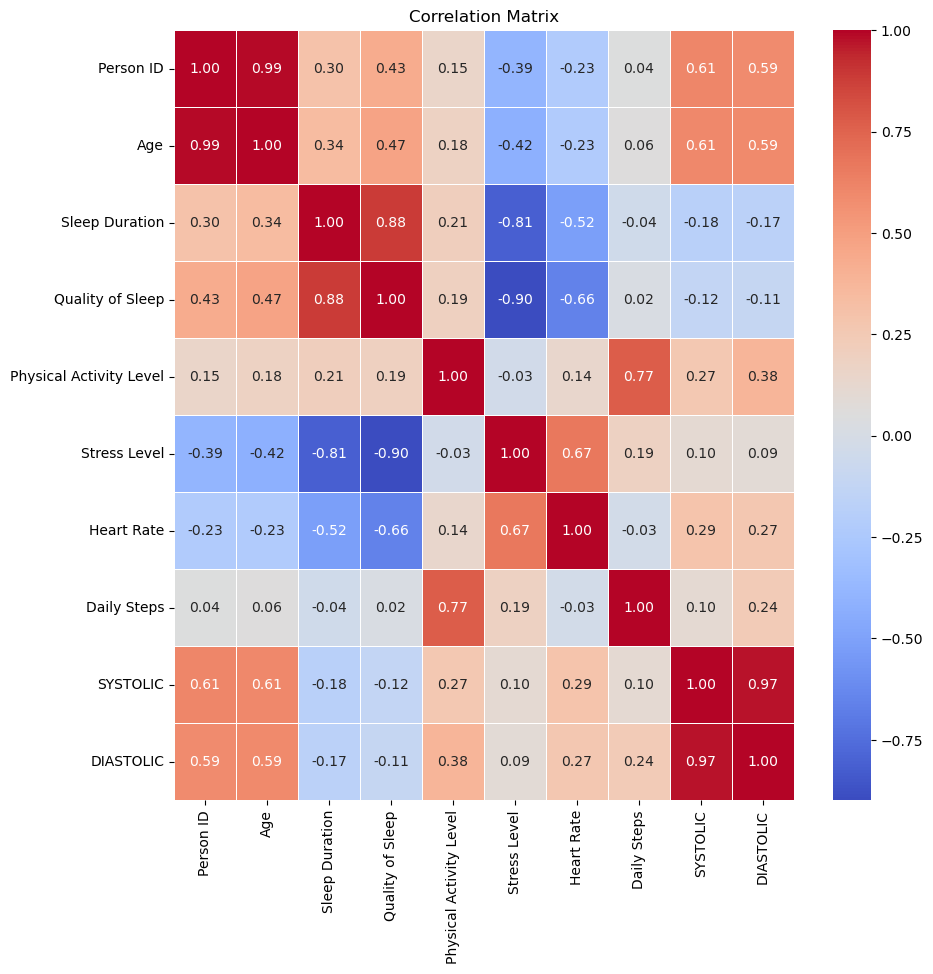

In [434]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns from the DataFrame
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix for the numeric columns
corr = df[num_cols].corr()

# Set the size of the figure for the heatmap
plt.figure(figsize=(10, 10))
# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title to the heatmap
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

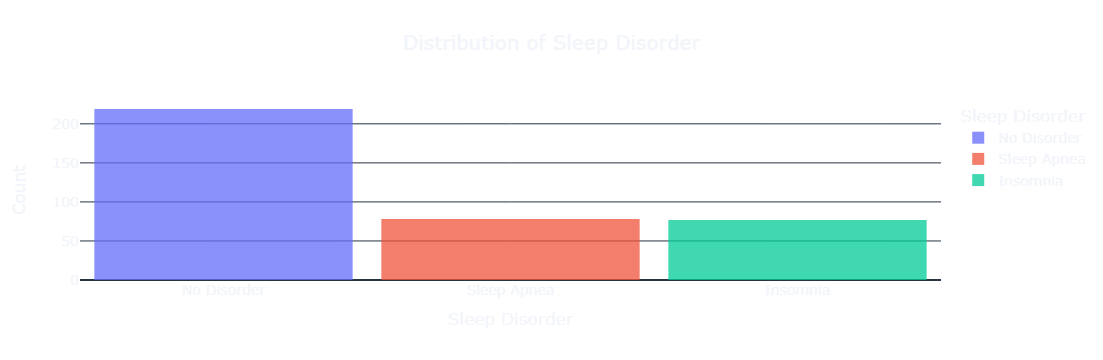

In [435]:
import plotly.express as px

# Create a histogram to visualize the distribution of 'Sleep Disorder'
# Assuming 'data' is your DataFrame and it contains a column named 'Sleep Disorder'
fig = px.histogram(data, x='Sleep Disorder', title='Distribution of Sleep Disorder',
                   labels={'Sleep Disorder': 'Sleep Disorder'}, 
                   color='Sleep Disorder',
                   template='plotly_dark')

# Update layout of the histogram
fig.update_layout(
    xaxis_title='Sleep Disorder',
    yaxis_title='Count',
    title={
        'text': "Distribution of Sleep Disorder",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, # Configure title properties
    font=dict(size=14), # Set overall font size
    plot_bgcolor='rgba(0,0,0,0)',   # Set plot background to transparent
    paper_bgcolor='rgba(0,0,0,0)',  # Set paper background to transparent
    bargap=0,  # Set the gap between bars to 0
    bargroupgap=0.1  # Set the gap between groups of bars
)

# Set opacity of the bars
fig.update_traces(opacity=0.75)

# Display the histogram
fig.show()

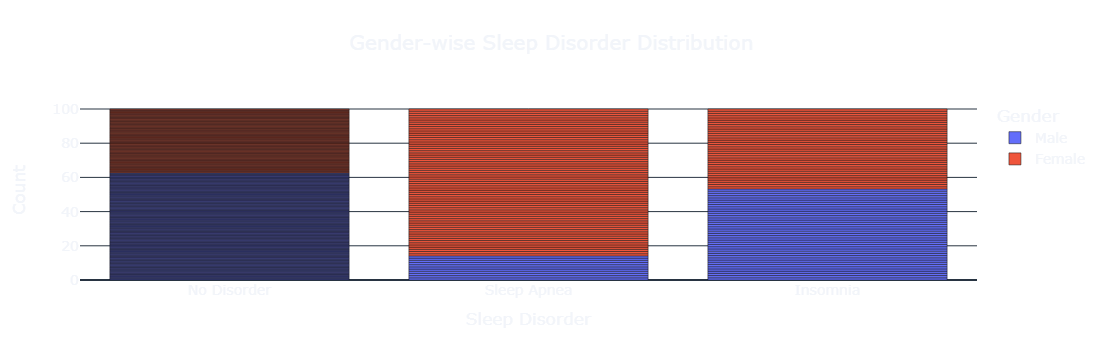

In [436]:
# Create a bar chart to visualize the distribution of 'Sleep Disorder' by 'Gender'
# Assuming 'data' is your DataFrame and it contains columns named 'Sleep Disorder' and 'Gender'
fig = px.bar(data, x='Sleep Disorder', color='Gender', 
             title='Gender-wise Sleep Disorder Distribution',
             labels={'Sleep Disorder': 'Sleep Disorder', 'Gender': 'Gender', 'count': 'Count'},
             template='plotly_dark')

# Update layout of the bar chart
fig.update_layout(
    xaxis_title='Sleep Disorder', # Set x-axis title
    yaxis_title='Count', # Set y-axis title
    title={
        'text': "Gender-wise Sleep Disorder Distribution",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, # Configure title properties
    font=dict(size=14), # Set overall font size
    plot_bgcolor='rgba(0,0,0,0)', # Set plot background to transparent
    paper_bgcolor='rgba(0,0,0,0)', # Set paper background to transparent
    bargap=0.2, # Set the gap between bars to 0.2
    barnorm='percent', # Normalize the bar heights to show percentages
)

# Show the bar chart
fig.show()

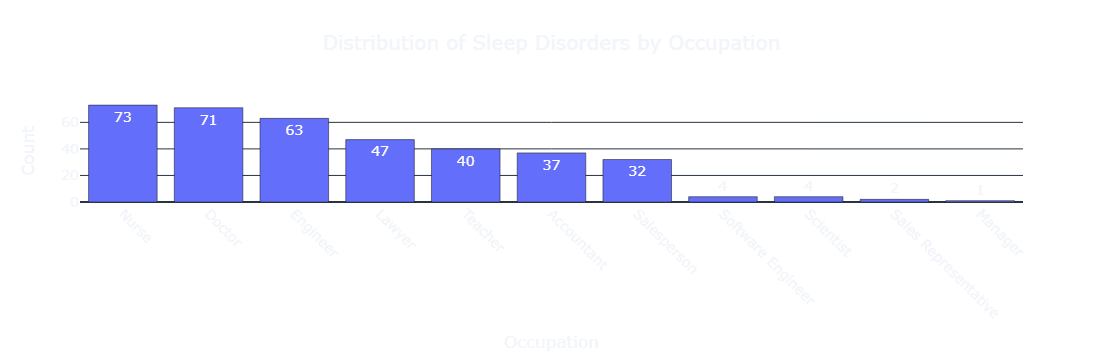

In [437]:
import plotly.express as px

# Calculate the counts of each unique value in the 'Occupation' column and reset the index
occupation_counts = data['Occupation'].value_counts().reset_index()

# Rename the columns of the resulting DataFrame
occupation_counts.columns = ['Occupation', 'Count']

# Create a bar chart to visualize the distribution of sleep disorders by occupation
fig = px.bar(occupation_counts, x='Occupation', y='Count', 
             title='Distribution of Sleep Disorders by Occupation',
             labels={'Occupation': 'Occupation', 'Count': 'Count'},
             template='plotly_dark',
             text='Count')  # Display the count values on the bars

# Update layout of the bar chart
fig.update_layout(
    xaxis_title='Occupation',  # Set x-axis title
    yaxis_title='Count',  # Set y-axis title
    title={
        'text': "Distribution of Sleep Disorders by Occupation",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },  # Configure title properties
    font=dict(size=14),  # Set overall font size
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background to transparent
    paper_bgcolor='rgba(0,0,0,0)',  # Set paper background to transparent
    bargap=0.2,  # Set the gap between bars to 0.2
)

# Rotate x-axis tick labels for better readability
fig.update_xaxes(tickangle=45)

# Show the bar chart
fig.show()


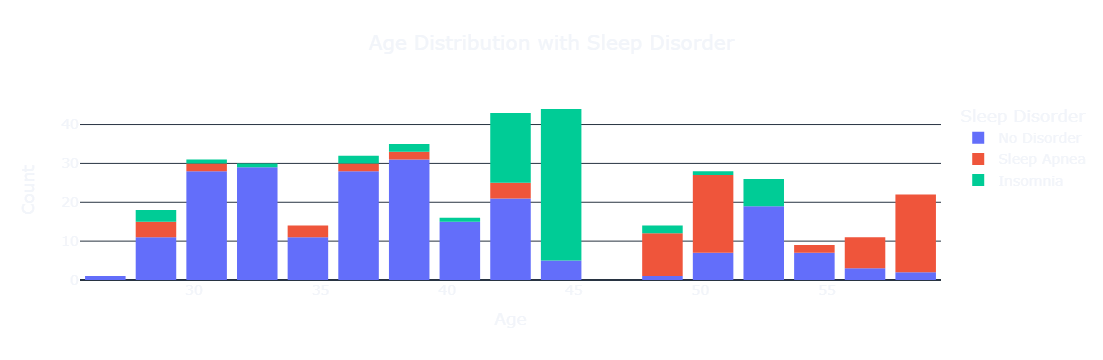

In [438]:
import plotly.express as px

# Create a histogram to visualize the age distribution with sleep disorder
# Assuming 'data' is your DataFrame and it contains columns named 'Age' and 'Sleep Disorder'
fig = px.histogram(data, x='Age', color='Sleep Disorder', 
                   title='Age Distribution with Sleep Disorder',
                   labels={'Age': 'Age', 'count': 'Count'},
                   template='plotly_dark')

# Update layout of the histogram
fig.update_layout(
    xaxis_title='Age',  # Set x-axis title
    yaxis_title='Count',  # Set y-axis title
    title={
        'text': "Age Distribution with Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },  # Configure title properties
    font=dict(size=14),  # Set overall font size
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background to transparent
    paper_bgcolor='rgba(0,0,0,0)',  # Set paper background to transparent
    bargap=0.2  # Set the gap between bars to 0.2
)

# Show the histogram
fig.show()


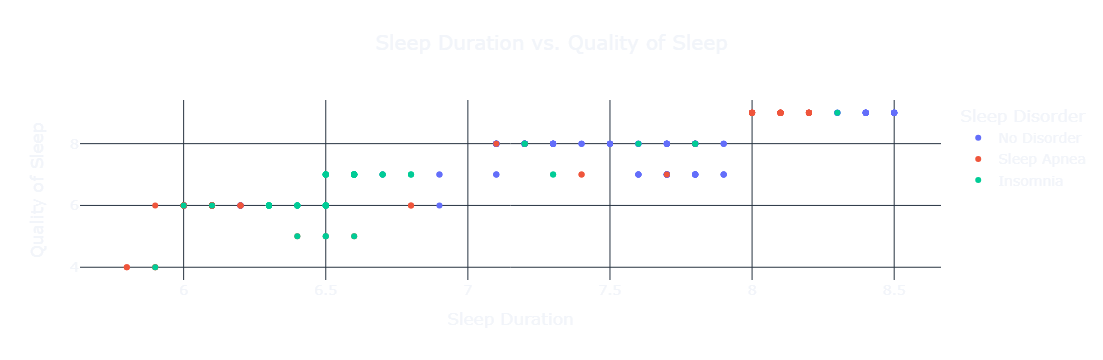

In [439]:
import plotly.express as px

# Create a scatter plot to visualize the relationship between sleep duration and quality of sleep
# Assuming 'data' is your DataFrame and it contains columns named 'Sleep Duration', 'Quality of Sleep', and 'Sleep Disorder'
fig = px.scatter(data, x='Sleep Duration', y='Quality of Sleep', color='Sleep Disorder', 
                 title='Sleep Duration vs. Quality of Sleep',
                 labels={'Sleep Duration': 'Sleep Duration', 'Quality of Sleep': 'Quality of Sleep'},
                 template='plotly_dark')

# Update layout of the scatter plot
fig.update_layout(
    xaxis_title='Sleep Duration',  # Set x-axis title
    yaxis_title='Quality of Sleep',  # Set y-axis title
    title={
        'text': "Sleep Duration vs. Quality of Sleep",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },  # Configure title properties
    font=dict(size=14),  # Set overall font size
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background to transparent
    paper_bgcolor='rgba(0,0,0,0)'  # Set paper background to transparent
)

# Show the scatter plot
fig.show()


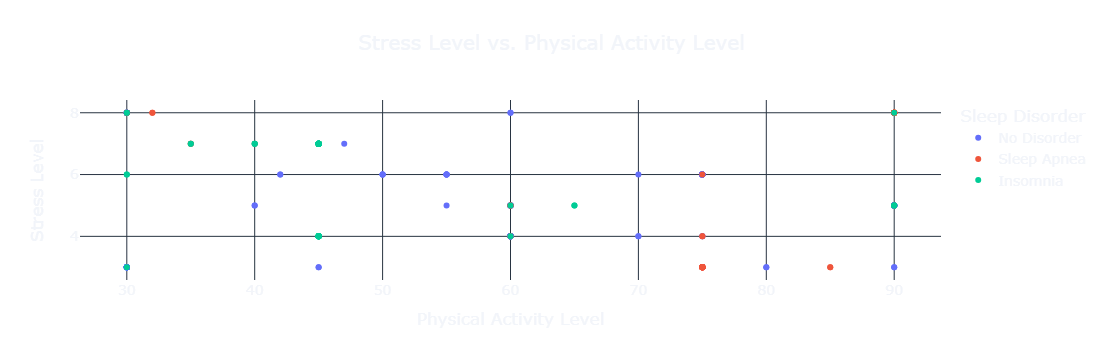

In [440]:
import plotly.express as px

# Create a scatter plot to visualize the relationship between physical activity level and stress level
# Assuming 'data' is your DataFrame and it contains columns named 'Physical Activity Level', 'Stress Level', and 'Sleep Disorder'
fig = px.scatter(data, x='Physical Activity Level', y='Stress Level', color='Sleep Disorder', 
                 title='Stress Level vs. Physical Activity Level',
                 labels={'Physical Activity Level': 'Physical Activity Level', 'Stress Level': 'Stress Level'},
                 template='plotly_dark')

# Update layout of the scatter plot
fig.update_layout(
    xaxis_title='Physical Activity Level',  # Set x-axis title
    yaxis_title='Stress Level',  # Set y-axis title
    title={
        'text': "Stress Level vs. Physical Activity Level",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },  # Configure title properties
    font=dict(size=14),  # Set overall font size
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background to transparent
    paper_bgcolor='rgba(0,0,0,0)'  # Set paper background to transparent
)

# Show the scatter plot
fig.show()


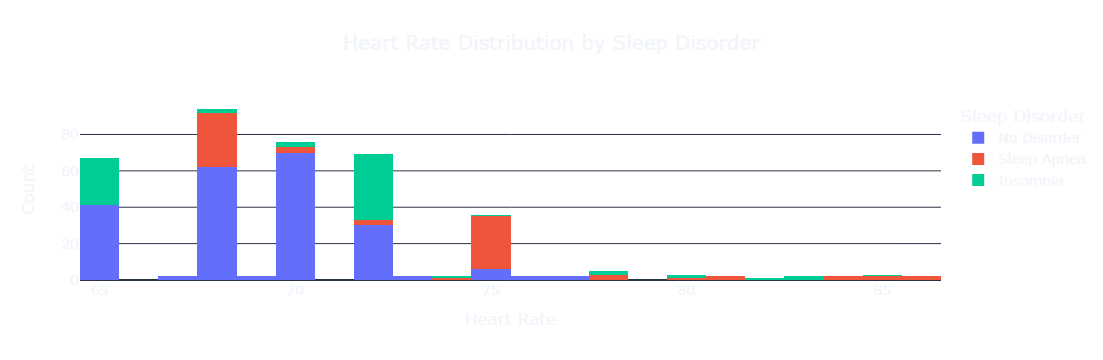

In [441]:
import plotly.express as px

# Create a histogram to visualize the distribution of heart rate by sleep disorder
# Assuming 'data' is your DataFrame and it contains columns named 'Heart Rate' and 'Sleep Disorder'
fig = px.histogram(data, x='Heart Rate', color='Sleep Disorder', 
                   title='Heart Rate Distribution by Sleep Disorder',
                   labels={'Heart Rate': 'Heart Rate', 'count': 'Count'},
                   template='plotly_dark')

# Update layout of the histogram
fig.update_layout(
    xaxis_title='Heart Rate',  # Set x-axis title
    yaxis_title='Count',  # Set y-axis title
    title={
        'text': "Heart Rate Distribution by Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },  # Configure title properties
    font=dict(size=14),  # Set overall font size
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background to transparent
    paper_bgcolor='rgba(0,0,0,0)'  # Set paper background to transparent
)

# Show the histogram
fig.show()


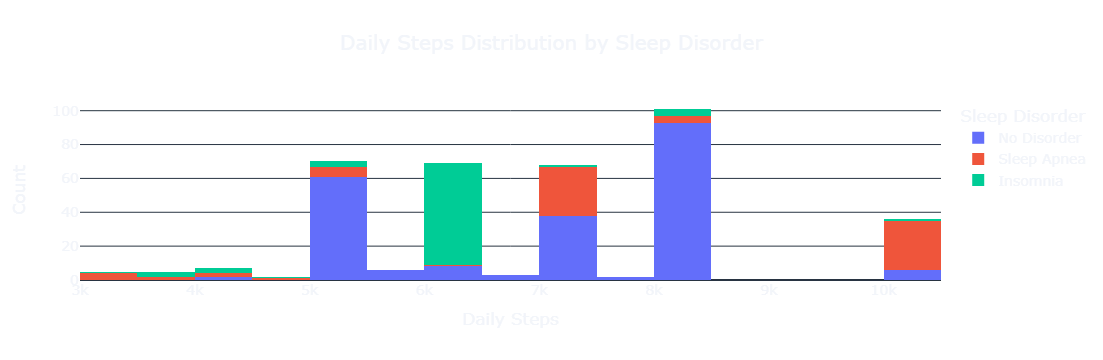

In [442]:
import plotly.express as px

# Create a histogram to visualize the distribution of daily steps by sleep disorder
# Assuming 'data' is your DataFrame and it contains columns named 'Daily Steps' and 'Sleep Disorder'
fig = px.histogram(data, x='Daily Steps', color='Sleep Disorder', 
                   title='Daily Steps Distribution by Sleep Disorder',
                   labels={'Daily Steps': 'Daily Steps', 'count': 'Count'},
                   template='plotly_dark')

# Update layout of the histogram
fig.update_layout(
    xaxis_title='Daily Steps',  # Set x-axis title
    yaxis_title='Count',  # Set y-axis title
    title={
        'text': "Daily Steps Distribution by Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },  # Configure title properties
    font=dict(size=14),  # Set overall font size
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background to transparent
    paper_bgcolor='rgba(0,0,0,0)'  # Set paper background to transparent
)

# Show the histogram
fig.show()


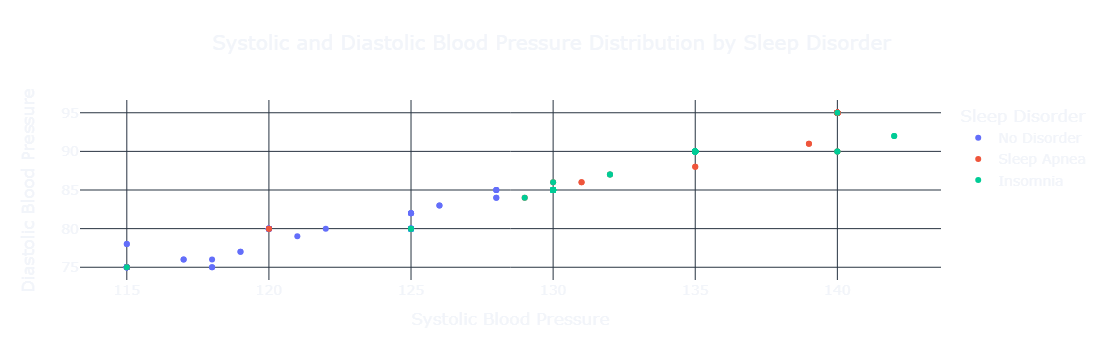

In [443]:
import plotly.express as px

# Create a scatter plot to visualize the distribution of systolic and diastolic blood pressure by sleep disorder
# Assuming 'data' is your DataFrame and it contains columns named 'SYSTOLIC', 'DIASTOLIC', and 'Sleep Disorder'
fig = px.scatter(data, x='SYSTOLIC', y='DIASTOLIC', color='Sleep Disorder', 
                 title='Systolic and Diastolic Blood Pressure Distribution by Sleep Disorder',
                 labels={'SYSTOLIC': 'Systolic Blood Pressure', 'DIASTOLIC': 'Diastolic Blood Pressure'},
                 template='plotly_dark')

# Update layout of the scatter plot
fig.update_layout(
    xaxis_title='Systolic Blood Pressure',  # Set x-axis title
    yaxis_title='Diastolic Blood Pressure',  # Set y-axis title
    title={
        'text': "Systolic and Diastolic Blood Pressure Distribution by Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },  # Configure title properties
    font=dict(size=14),  # Set overall font size
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background to transparent
    paper_bgcolor='rgba(0,0,0,0)'  # Set paper background to transparent
)

# Show the scatter plot
fig.show()


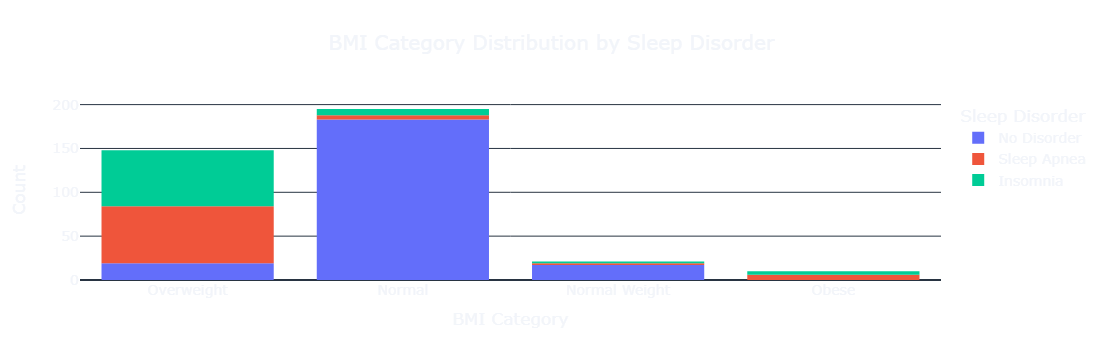

In [444]:
import plotly.express as px

# Create a histogram to visualize the distribution of BMI categories by sleep disorder
# Assuming 'data' is your DataFrame and it contains columns named 'BMI Category' and 'Sleep Disorder'
fig = px.histogram(data, x='BMI Category', color='Sleep Disorder', 
                   title='BMI Category Distribution by Sleep Disorder',
                   labels={'BMI Category': 'BMI Category', 'count': 'Count'},
                   template='plotly_dark')

# Update layout of the histogram
fig.update_layout(
    xaxis_title='BMI Category',  # Set x-axis title
    yaxis_title='Count',  # Set y-axis title
    title={
        'text': "BMI Category Distribution by Sleep Disorder",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },  # Configure title properties
    font=dict(size=14),  # Set overall font size
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background to transparent
    paper_bgcolor='rgba(0,0,0,0)'  # Set paper background to transparent
)

# Show the histogram
fig.show()


**Renaming**

In [445]:
# Replace "Normal Weight" with "Normal" in the 'BMI Category' column
data['BMI Category'] = data['BMI Category'].replace("Normal Weight", "Normal")

# Count the occurrences of each unique value in the 'BMI Category' column
bmi_category_counts = data['BMI Category'].value_counts()

# Display the counts of each unique value in the 'BMI Category' column
bmi_category_counts


BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [446]:
# Count the occurrences of each unique value in the 'Occupation' column
occupation_counts = data['Occupation'].value_counts()

# Display the counts of each unique value in the 'Occupation' column
occupation_counts


Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [447]:
# Define the list of occupations to be renamed to 'Others'
occupations_to_rename = ['Software Engineer', 'Scientist', 'Sales Representative', 'Manager']

# Replace the specified occupations with 'Others' in the 'Occupation' column
data['Occupation'] = data['Occupation'].replace(occupations_to_rename, 'Others')

# Count the occurrences of each unique value in the updated 'Occupation' column
updated_occupation_counts = data['Occupation'].value_counts()

# Display the counts of each unique value in the updated 'Occupation' column
updated_occupation_counts


Occupation
Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
Others         11
Name: count, dtype: int64

**Encoding**

In [448]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Initialize a dictionary to store label encoders for each categorical column
label_encoders = {}

# List of categorical columns to be encoded
categorical_columns = ['Occupation', 'BMI Category', 'Sleep Disorder', 'Gender']

# Encode each categorical column and store the label encoder in the dictionary
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Optionally, save label encoders to disk (commented out)
# for column, le in label_encoders.items():
#     joblib.dump(le, f'{column}_label_encoder.pkl')

# Display the first few rows of the updated DataFrame
data.head()


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,1,27,5,6.1,6,42,6,2,77,4200,1,126.0,83.0
1,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
3,1,28,5,5.9,4,30,8,1,85,3000,2,140.0,90.0
4,1,28,5,5.9,4,30,8,1,85,3000,2,140.0,90.0


In [509]:
# Count the occurrences of each unique value in the 'Sleep Disorder' column
sleep_disorder_counts = data['Sleep Disorder'].value_counts()

# Display the counts of each unique value in the 'Sleep Disorder' column
sleep_disorder_counts


Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64

In [507]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']

# Initialize SMOTE for handling class imbalance
smote = SMOTE(random_state=1)

# Apply SMOTE to resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)


**Splitting and Model Building**

In [450]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_resampled, target_resampled, train_size=0.7, test_size=0.3, random_state=4)

# Initialize the MinMaxScaler for feature scaling
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Optionally, save the scaler to disk using joblib (commented out)
# joblib.dump(scaler, 'minmax_scaler_split.pkl')

# Print the shapes of the scaled training and testing data and the target variables
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train_scaled shape: (459, 12)
X_test_scaled shape: (198, 12)
y_train shape: (459,)
y_test shape: (198,)


In [451]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the K-Nearest Neighbors classifier with 3 neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the scaled training data
knn_model.fit(X_train_scaled, y_train)

# Predict the target variable on the scaled testing data
y_pred = knn_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8636363636363636
Precision: 0.8636363636363636
Recall: 0.8636363636363636
F1-score: 0.8636363636363636


In [452]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Fit the model on the scaled training data
nb_model.fit(X_train_scaled, y_train)

# Predict the target variable on the scaled testing data
y_pred_nb = nb_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1-score:", f1_nb)


Accuracy: 0.8737373737373737
Precision: 0.8799970484750809
Recall: 0.8737373737373737
F1-score: 0.8746132454501515


In [453]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Gradient Boosting Classifier with specified parameters
gb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.4, max_depth=8, random_state=1)

# Fit the model on the scaled training data
gb_model.fit(X_train_scaled, y_train)

# Predict the target variable on the scaled testing data
y_pred_gb = gb_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1-score:", f1_gb)


Accuracy: 0.8636363636363636
Precision: 0.8650994067660734
Recall: 0.8636363636363636
F1-score: 0.8637258278055273


In [454]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Support Vector Classifier
svc_model = SVC()

# Fit the model on the scaled training data
svc_model.fit(X_train_scaled, y_train)

# Predict the target variable on the scaled testing data
y_pred_svc = svc_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy_svc)
print("Precision:", precision_svc)
print("Recall:", recall_svc)
print("F1-score:", f1_svc)


Accuracy: 0.8686868686868687
Precision: 0.8692056553882683
Recall: 0.8686868686868687
F1-score: 0.8686401528128147


**Hyperparameter tuning finding the best parameters**

In [455]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the DecisionTreeClassifier with class_weight='balanced'
model = DecisionTreeClassifier(class_weight='balanced')

# Fit the model on the training data
model.fit(x_train, y_train)

Y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8737373737373737
Precision: 0.8747615536696448
Recall: 0.8737373737373737
F1-score: 0.8735507747149589


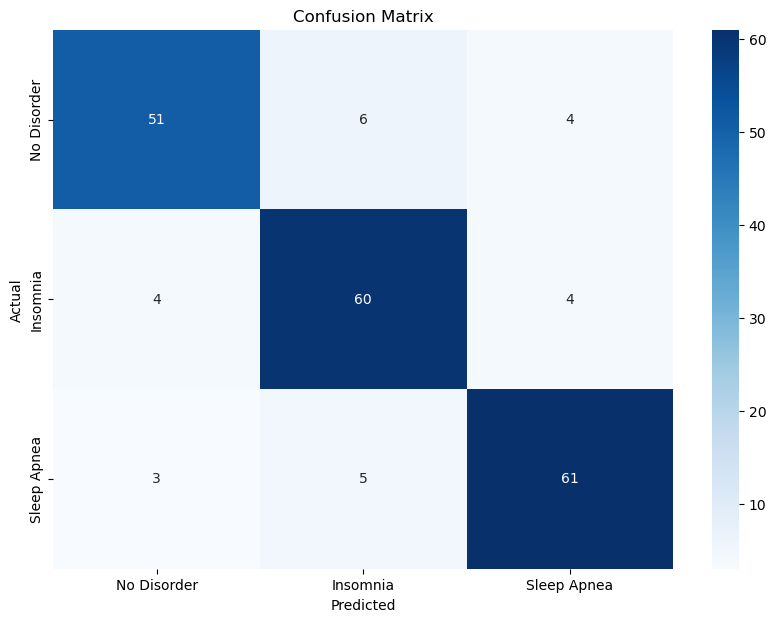

In [456]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot the confusion matrix
def plot_confusion_matrix(true_labels, predictions, class_names):
    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage
true_labels = y_test  # True labels
predictions = y_pred_svc  # Predictions from the model
class_names = ['No Disorder', 'Insomnia', 'Sleep Apnea']  # Class names

# Plot the confusion matrix
plot_confusion_matrix(true_labels, predictions, class_names)


In [457]:
from sklearn.metrics import classification_report

# Generate a classification report
classification_report_svc = classification_report(true_labels, predictions, target_names=class_names)

# Print the classification report
print(classification_report_svc)


              precision    recall  f1-score   support

 No Disorder       0.88      0.84      0.86        61
    Insomnia       0.85      0.88      0.86        68
 Sleep Apnea       0.88      0.88      0.88        69

    accuracy                           0.87       198
   macro avg       0.87      0.87      0.87       198
weighted avg       0.87      0.87      0.87       198



In [458]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for class weights
param_grid = {
    'class_weight': [
        {0: 1.0, 1: 1.0, 2: 1.0},   # Equal weights
        {0: 3.0, 1: 1.0, 2: 4.0},   # Initial weights
        {0: 2.0, 1: 1.0, 2: 5.0},   # Adjusted weights
        {0: 4.0, 1: 1.0, 2: 3.0}    # Another variation
    ]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='weighted'),
    cv=5
)

# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters:", best_params)

# Train the final model with the best parameters
final_model = DecisionTreeClassifier(class_weight=best_params['class_weight'])
final_model.fit(X_train_scaled, y_train)

# Predict on the test data using the final model
y_pred_final = final_model.predict(X_test_scaled)

# Calculate evaluation metrics for the final model
accuracy_final = accuracy_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final, average='weighted')
recall_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

# Print evaluation metrics for the final model
print("Final Accuracy:", accuracy_final)
print("Final Precision:", precision_final)
print("Final Recall:", recall_final)
print("Final F1-score:", f1_final)


Best parameters: {'class_weight': {0: 1.0, 1: 1.0, 2: 1.0}}
Final Accuracy: 0.8686868686868687
Final Precision: 0.870198761811665
Final Recall: 0.8686868686868687
Final F1-score: 0.8682724682724683


In [459]:
from sklearn.metrics import classification_report

# Generate a classification report for the final model
final_classification_report = classification_report(y_test, y_pred_final, target_names=class_names)

# Print the classification report
print(final_classification_report)


              precision    recall  f1-score   support

 No Disorder       0.85      0.85      0.85        61
    Insomnia       0.90      0.82      0.86        68
 Sleep Apnea       0.85      0.93      0.89        69

    accuracy                           0.87       198
   macro avg       0.87      0.87      0.87       198
weighted avg       0.87      0.87      0.87       198



In [6]:
# import joblib

# joblib.dump(model, 'best_model_decision_tree.pkl')

# print("Model saved successfully!")